In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load training and testing datasets
train_df = pd.read_csv("mnist_train.csv")  # Training dataset
test_df = pd.read_csv("mnist_test.csv")    # Testing dataset

In [3]:
# Split into features (X) and labels (y)
X_train = train_df.drop(columns=['label']).values  # Features
y_train = train_df['label'].values  # Labels

X_test = test_df.drop(columns=['label']).values  # Features
y_test = test_df['label'].values  # Labels

In [4]:
# Normalize data (scale pixel values between 0 and 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize KNN classifier with k=3 (you can tune this)
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='auto')

# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Print first 10 predictions
print("First 10 Predicted Labels:", y_pred[:10])
print("First 10 Actual Labels:   ", y_test[:10])

First 10 Predicted Labels: [7 2 1 0 4 1 4 9 5 9]
First 10 Actual Labels:    [7 2 1 0 4 1 4 9 5 9]


In [7]:
# Compute accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 KNN Model Accuracy: {knn_accuracy:.4f}")

🎯 KNN Model Accuracy: 0.9452


In [8]:
# Print classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



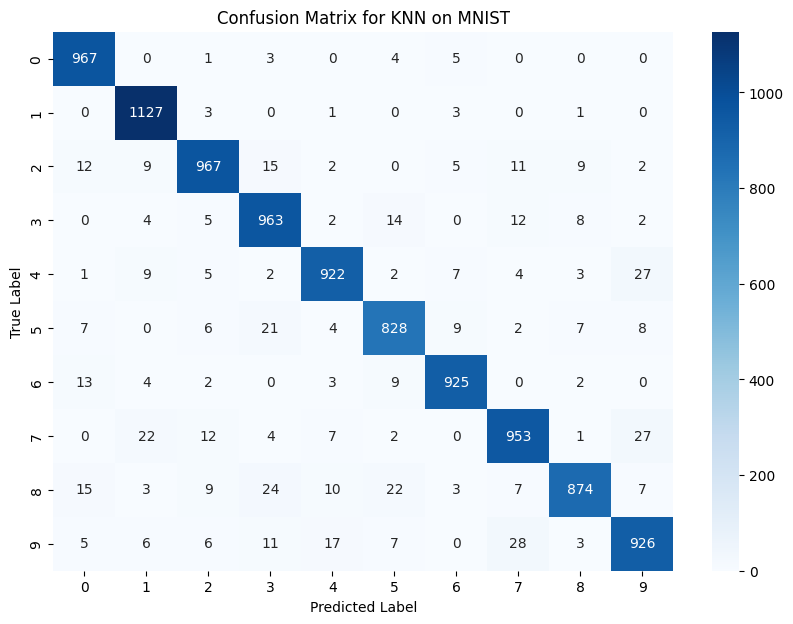

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN on MNIST")
plt.show()

🔢 Predicted Label: 7


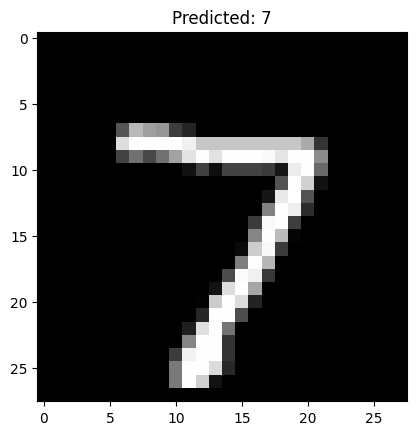

In [10]:
# Select a sample image from the test set
index = 0  # Change index to test different images
img = X_test[index].reshape(28, 28)  # Reshape back to 28x28

# Predict the digit
predicted_label = knn_model.predict([X_test_scaled[index]])
print(f"🔢 Predicted Label: {predicted_label[0]}")

# Display the image
plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {predicted_label[0]}")
plt.show()
